In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')

In [3]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['CustomerId', 'Surname'], inplace = True)

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Geo = LabelEncoder()
df['Geography'] = labelencoder_Geo.fit_transform(df['Geography'])
labelencoder_Gender = LabelEncoder()
df['Gender'] = labelencoder_Gender.fit_transform(df['Gender'])

In [8]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [10]:
X = df.drop('Exited',axis=1).values
y = df['Exited'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=69)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape

(7500, 10)

In [19]:
model = Sequential()

model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=5,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
%%time

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
235/235 [==============================] - 0s 2ms/step - loss: 0.5699 - val_loss: 0.5121
Epoch 2/100
235/235 [==============================] - 0s 969us/step - loss: 0.4856 - val_loss: 0.4993
Epoch 3/100
235/235 [==============================] - 0s 921us/step - loss: 0.4750 - val_loss: 0.4889
Epoch 4/100
235/235 [==============================] - 0s 928us/step - loss: 0.4667 - val_loss: 0.4819
Epoch 5/100
235/235 [==============================] - 0s 836us/step - loss: 0.4607 - val_loss: 0.4778
Epoch 6/100
235/235 [==============================] - 0s 862us/step - loss: 0.4555 - val_loss: 0.4719
Epoch 7/100
235/235 [==============================] - 0s 918us/step - loss: 0.4507 - val_loss: 0.4660
Epoch 8/100
235/235 [==============================] - 0s 914us/step - loss: 0.4452 - val_loss: 0.4623
Epoch 9/100
235/235 [==============================] - 0s 837us/step - loss: 0.4420 - val_loss: 0.4563
Epoch 10/100
235/235 [==============================] - 0s 866us/step - los

Epoch 80/100
235/235 [==============================] - 0s 871us/step - loss: 0.3512 - val_loss: 0.3579
Epoch 81/100
235/235 [==============================] - 0s 908us/step - loss: 0.3505 - val_loss: 0.3572
Epoch 82/100
235/235 [==============================] - 0s 879us/step - loss: 0.3508 - val_loss: 0.3579
Epoch 83/100
235/235 [==============================] - 0s 743us/step - loss: 0.3497 - val_loss: 0.3578
Epoch 84/100
235/235 [==============================] - 0s 929us/step - loss: 0.3497 - val_loss: 0.3573
Epoch 85/100
235/235 [==============================] - 0s 764us/step - loss: 0.3500 - val_loss: 0.3577
Epoch 86/100
235/235 [==============================] - 0s 879us/step - loss: 0.3500 - val_loss: 0.3584
Epoch 87/100
235/235 [==============================] - 0s 805us/step - loss: 0.3492 - val_loss: 0.3564
Epoch 88/100
235/235 [==============================] - 0s 862us/step - loss: 0.3493 - val_loss: 0.3569
Epoch 89/100
235/235 [==============================] - 0s 760us

In [21]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

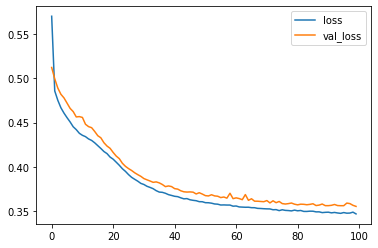

In [22]:
model_loss.plot()

In [23]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1965
           1       0.76      0.46      0.57       535

    accuracy                           0.85      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [26]:
print(confusion_matrix(y_test,predictions))

[[1887   78]
 [ 290  245]]


In [27]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.0,1,1,1,101348.88,1


In [37]:
new_input = pd.DataFrame([[499, 'France', 'Male', 39, 3, 50000.00, 2, 1, 1, 60000.00]], columns= ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [38]:
new_input

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,499,France,Male,39,3,50000.0,2,1,1,60000.0


In [39]:
new_input['Geography'] = labelencoder_Geo.transform(new_input['Geography'])

In [40]:
new_input['Gender'] = labelencoder_Gender.transform(new_input['Gender'])

In [41]:
new_input

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,499,0,1,39,3,50000.0,2,1,1,60000.0


In [42]:
new_input = scaler.transform(new_input)

In [35]:
np.round(model.predict(new_input)) 

array([[0.]], dtype=float32)